In [1]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import os, copy, random
import matplotlib.pyplot as plt
import collections
import scipy.io
import gzip
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

n_mnist_file = './dataset/n_mnist/mnist-with-awgn.mat'

data = scipy.io.loadmat(n_mnist_file)
X_train = data['train_x']
y_train = data['train_y']
X_test = data['test_x']
y_test = data['test_y']
print('train dataset: {} {}'.format(len(X_train), len(y_train)))
print('test dataset: {} {}'.format(len(X_test), len(y_test)))

train dataset: 60000 60000
test dataset: 10000 10000


(784,)
2


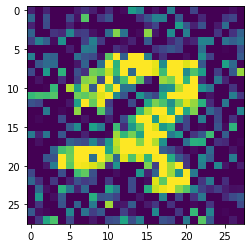

In [2]:
# reformat label data.
y_train = np.array([int(np.where(y_train[i] == 1)[0]) for i in range(len(y_train))])
y_test = np.array([int(np.where(y_test[i] == 1)[0]) for i in range(len(y_test))])
# visualize and check data and label.
classes=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
index = 30
print(X_train[0].shape)
plt.imshow(X_train[index].reshape(28,28))
print(classes[y_train[index]])

In [3]:
# count number of each class -> check data balance.
train_count = collections.Counter(y_train)
print(train_count)
test_count = collections.Counter(y_test)
print(test_count)

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


In [4]:
#make this reproducible with seed fixed
np.random.seed(42)

#subsampling each class
subset_X_train = []
subset_y_train = []
subset_per_each_train = 600
for i in range(len(classes)):
    _class_idx = np.where(y_train == i)[0]
    print('sampled from class {} : {}'.format(i, len(_class_idx)))
    np.random.shuffle(_class_idx)
    subset_X_train.extend(X_train[_class_idx[:subset_per_each_train]])
    subset_y_train.extend(y_train[_class_idx[:subset_per_each_train]])

subset_X_test = []
subset_y_test = []
subset_per_each_test = 100
for i in range(len(classes)):
    _class_idx = np.where(y_test == i)[0]
    print('sampled from class {} : {}'.format(i, len(_class_idx)))
    np.random.shuffle(_class_idx)
    subset_X_test.extend(X_train[_class_idx[:subset_per_each_test]])
    subset_y_test.extend(y_train[_class_idx[:subset_per_each_test]])

print(len(subset_X_train), len(subset_y_train))
print(len(subset_X_test), len(subset_y_test))

scaler = StandardScaler()
subset_X_train = scaler.fit_transform(np.array(subset_X_train))
subset_y_train = np.array(subset_y_train)
subset_X_test = scaler.fit_transform(np.array(subset_X_test))
subset_y_test = np.array(subset_y_test)


sampled from class 0 : 5923
sampled from class 1 : 6742
sampled from class 2 : 5958
sampled from class 3 : 6131
sampled from class 4 : 5842
sampled from class 5 : 5421
sampled from class 6 : 5918
sampled from class 7 : 6265
sampled from class 8 : 5851
sampled from class 9 : 5949
sampled from class 0 : 980
sampled from class 1 : 1135
sampled from class 2 : 1032
sampled from class 3 : 1010
sampled from class 4 : 982
sampled from class 5 : 892
sampled from class 6 : 958
sampled from class 7 : 1028
sampled from class 8 : 974
sampled from class 9 : 1009
6000 6000
1000 1000


In [5]:
parameters = {'weights':["uniform"], 'n_neighbors':[3, 5, 7, 9, 11, 13]}
clf = KNeighborsClassifier()
clf_GS = GridSearchCV(clf, parameters, verbose=2, cv=10, n_jobs=-1)
clf_GS.fit(subset_X_train, subset_y_train)


Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform']},
             verbose=2)

In [6]:
print(clf_GS.best_params_)
print(clf_GS.cv_results_['mean_test_score'])

{'n_neighbors': 11, 'weights': 'uniform'}
[0.785      0.80516667 0.81166667 0.81316667 0.8135     0.81266667]


In [7]:
subset_y_test_pred = clf_GS.best_estimator_.predict(subset_X_test)
test_acc = metrics.accuracy_score(subset_y_test, subset_y_test_pred)
print('Test Accuracy of best model: {}'.format(test_acc))

Test Accuracy of best model: 0.838


In [8]:
#for learning rate analysis change subset_per_each_train as 100, 200, 300, 400, 500, 600

#make this reproducible with seed fixed
np.random.seed(42)

#subsampling each class
subset_X_train = []
subset_y_train = []
subset_per_each_train = 600
for i in range(len(classes)):
    _class_idx = np.where(y_train == i)[0]
    print('sampled from class {} : {}'.format(i, len(_class_idx)))
    np.random.shuffle(_class_idx)
    subset_X_train.extend(X_train[_class_idx[:subset_per_each_train]])
    subset_y_train.extend(y_train[_class_idx[:subset_per_each_train]])

print(len(subset_X_train), len(subset_y_train))
print(len(subset_X_test), len(subset_y_test))

scaler = StandardScaler()
subset_X_train = scaler.fit_transform(np.array(subset_X_train))
subset_y_train = np.array(subset_y_train)

sampled from class 0 : 5923
sampled from class 1 : 6742
sampled from class 2 : 5958
sampled from class 3 : 6131
sampled from class 4 : 5842
sampled from class 5 : 5421
sampled from class 6 : 5918
sampled from class 7 : 6265
sampled from class 8 : 5851
sampled from class 9 : 5949
6000 6000
1000 1000


In [9]:
l_clf = KNeighborsClassifier(n_neighbors=11, weights="uniform")
l_clf.fit(subset_X_train, subset_y_train)
subset_y_test_pred = l_clf.predict(subset_X_test)
train_score = l_clf.score(subset_X_train, subset_y_train)
test_acc = metrics.accuracy_score(subset_y_test, subset_y_test_pred)
print('Train score {:.4f} Test Accuracy of best model: {}'.format(train_score, test_acc))

Train score 0.8538 Test Accuracy of best model: 0.838


In [10]:
train_score_list=[]
test_acc_list=[]
for nei in range(2, 14):
    l_clf = KNeighborsClassifier(n_neighbors=nei, weights="uniform")
    l_clf.fit(subset_X_train, subset_y_train)
    subset_y_test_pred = l_clf.predict(subset_X_test)
    train_score = l_clf.score(subset_X_train, subset_y_train)
    test_acc = metrics.accuracy_score(subset_y_test, subset_y_test_pred)
    train_score_list.append(train_score)
    test_acc_list.append(test_acc)
print(train_score_list)
print(test_acc_list)

[0.8701666666666666, 0.884, 0.87, 0.8731666666666666, 0.8678333333333333, 0.8675, 0.863, 0.8625, 0.857, 0.8538333333333333, 0.8526666666666667, 0.8501666666666666]
[0.793, 0.825, 0.819, 0.833, 0.833, 0.837, 0.836, 0.834, 0.831, 0.838, 0.831, 0.829]


In [11]:
#performance
import time
t1 = time.time()
l_clf = KNeighborsClassifier(n_neighbors=11, weights="uniform")
l_clf.fit(subset_X_train, subset_y_train)
end_t1 = time.time()
train_score = l_clf.score(subset_X_train, subset_y_train)
t2 = time.time()
subset_y_test_pred = l_clf.predict(subset_X_test)
#test_acc = metrics.accuracy_score(subset_y_test, subset_y_test_pred)
end_t2 = time.time()
print('Train time {:.4f} Test time {:.4f}'.format((end_t1 - t1), (end_t2 - t2)))

Train time 0.0099 Test time 0.3781
